In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
ad_data = pd.read_csv('advertising.csv')
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [3]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


<Axes: xlabel='Age', ylabel='Count'>

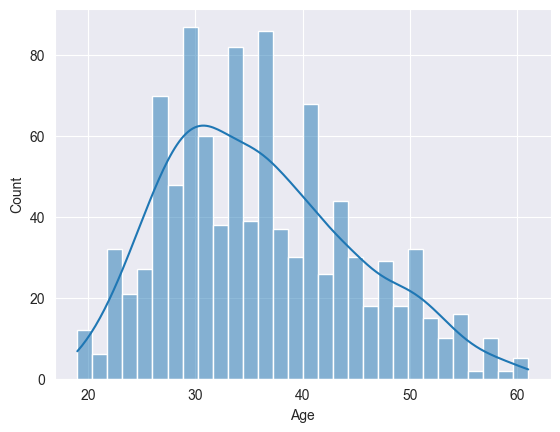

In [4]:
sns.histplot(ad_data['Age'], bins=30, kde=True)

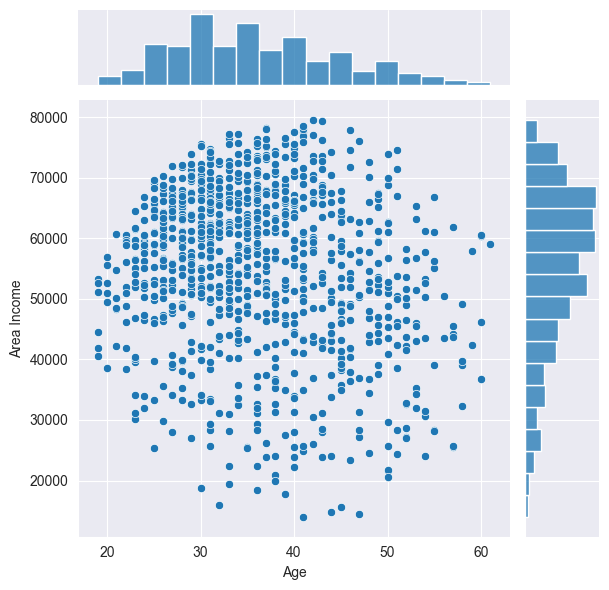

In [5]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

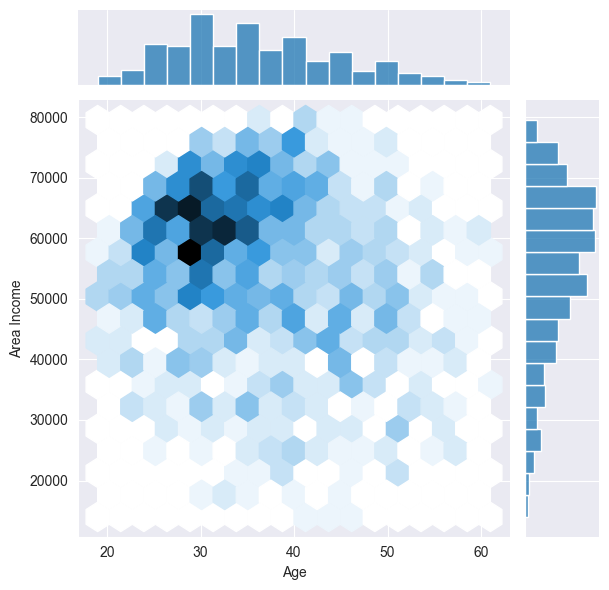

In [6]:
sns.jointplot(x='Age', y='Area Income', data=ad_data, kind='hex')

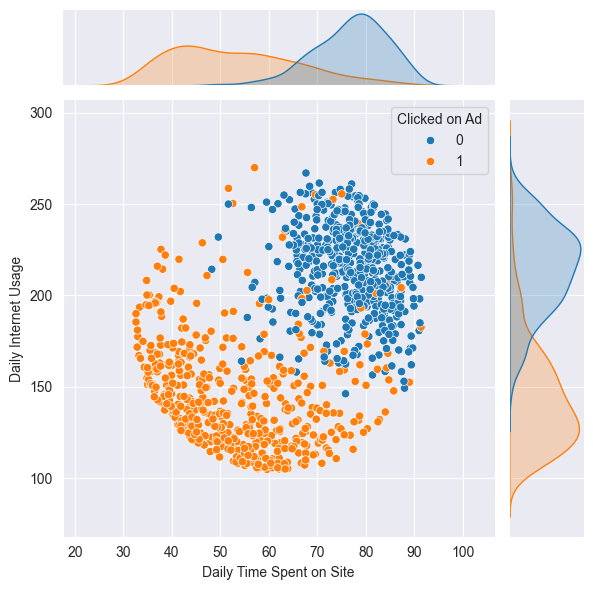

In [7]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, hue='Clicked on Ad')

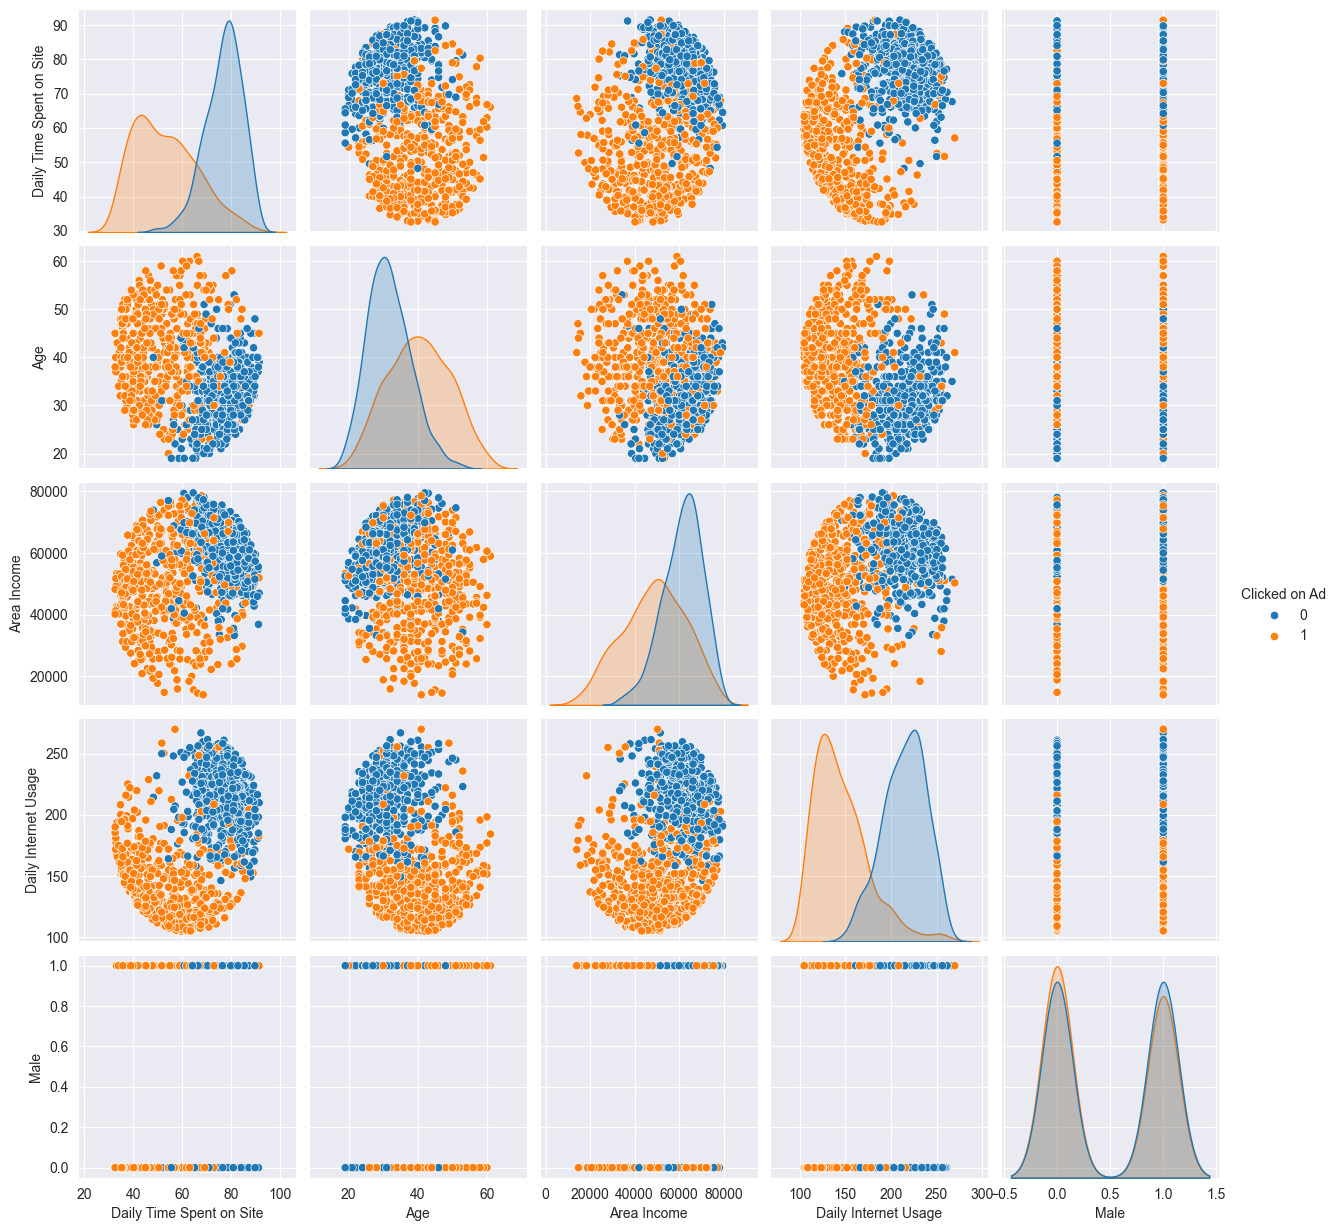

In [8]:
sns.pairplot(ad_data, hue='Clicked on Ad')

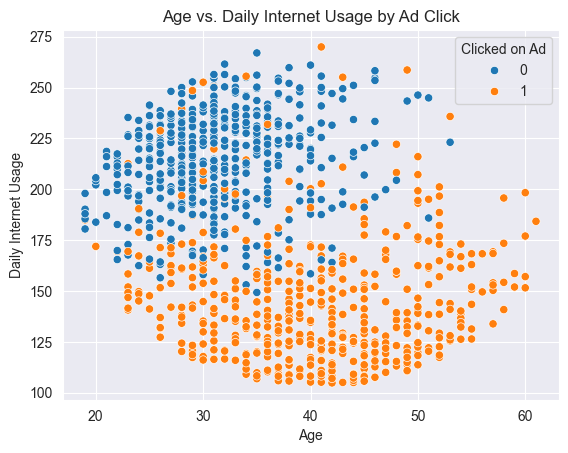

In [9]:
sns.scatterplot(data=ad_data, x='Age', y='Daily Internet Usage', hue='Clicked on Ad')
plt.title('Age vs. Daily Internet Usage by Ad Click')
plt.show()

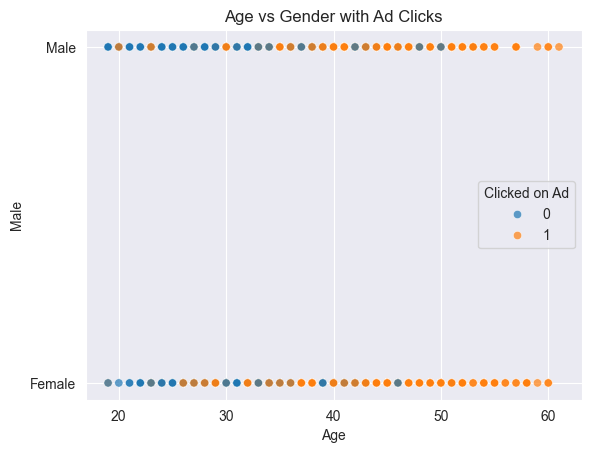

In [10]:
sns.scatterplot(data=ad_data, x='Age', y='Male', hue='Clicked on Ad', alpha=0.7)
plt.title('Age vs Gender with Ad Clicks')
plt.yticks([0, 1], ['Female', 'Male'])
plt.show()

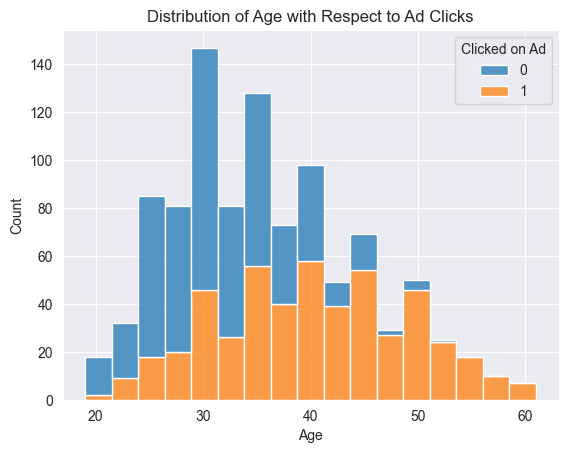

In [11]:
sns.histplot(data=ad_data, x='Age', hue='Clicked on Ad', multiple='stack')
plt.title('Distribution of Age with Respect to Ad Clicks')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
X = ad_data[['Area Income', 'Age', 'Daily Time Spent on Site', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [14]:
logmodel = LogisticRegression(max_iter=1000)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
logmodel.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [17]:
prediction = logmodel.predict(X_test)

In [18]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [19]:
confusion_matrix(y_test, prediction)

array([[155,   2],
       [  5, 138]])

In [20]:
X.columns

Index(['Area Income', 'Age', 'Daily Time Spent on Site',
       'Daily Internet Usage', 'Male'],
      dtype='object')

In [21]:
coef_df = pd.DataFrame(logmodel.coef_[0], X.columns, columns=['Coefficient'])
print(coef_df)
print("Intercept:", logmodel.intercept_[0])


                          Coefficient
Area Income                 -0.000123
Age                          0.141046
Daily Time Spent on Site    -0.177419
Daily Internet Usage        -0.059916
Male                        -0.465823
Intercept: 25.84653984881983


In [22]:
clicked_avg_age = ad_data[ad_data['Clicked on Ad'] == 1]['Age'].mean()
not_clicked_avg_age = ad_data[ad_data['Clicked on Ad'] == 0]['Age'].mean()

print(f"Average age of users who clicked: {clicked_avg_age} age")
print(f"Average age of users who did not click: {not_clicked_avg_age} age")

Average age of users who clicked: 40.334 age
Average age of users who did not click: 31.684 age
